# Problem Statement :

The <b>Bank Marketing data</b> is related with <b>direct marketing campaigns</b> of a Portuguese banking institution. 

- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 
<br>

- The <b>classification goal</b> is to <b>predict</b> if the <b>client will subscribe a Term Deposit Taken (variable y)</b>.

# Predictor / Independent Variables :

<b>1. Age :</b> (numeric)
<br>

<b>2. Job :</b> type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
<br>

<b>3. Marital Status :</b> marital status (categorical: “divorced”, “married”, “single”, “unknown”)
<br>

<b>4. Education :</b> (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
<br>

<b>5. Credit Default :</b> has credit in default? (categorical: “no”, “yes”, “unknown”).
<br>

<b>6. Housing Loan :</b> has housing loan? (categorical: “no”, “yes”, “unknown”)
<br>

<b>7. Personal Loan :</b> has personal loan? (categorical: “no”, “yes”, “unknown”)
<br>

# Target / Dependent Variable :

<b>1. Term Deposit Taken : </b> has the client subscribed a <b>term deposit ? </b> (binary: <b>“1” means “Yes”, “0” means “No”</b> )

# 1.0 Import Python Packages :

In [1]:
# Scientific and Data Manipulation Libraries :

import pandas as pd
import numpy as np
import copy

# Visualization Libraries:

from matplotlib.pyplot import gcf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.color_palette("BrBG", 7)

# https://seaborn.pydata.org/tutorial/color_palettes.html


# Classification Model Libraries :

from sklearn.tree                    import DecisionTreeClassifier, plot_tree, export_graphviz

# from sklearn.svm                   import SVC
# from sklearn.naive_bayes           import GaussianNB
# from sklearn.neighbors             import KNeighborsClassifier
# from sklearn.linear_model          import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.ensemble              import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Pre-Processing Libraries:

from sklearn.preprocessing         import LabelEncoder, StandardScaler, MinMaxScaler

# Metrics Libraries:

from sklearn                       import metrics as m
from sklearn.model_selection       import ShuffleSplit, StratifiedShuffleSplit, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

# Plotting and Visulaizating Libraries :

import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image, SVG, display
# from graphviz import Source                              
from ipywidgets import interactive

# import statsmodels.formula.api as smf
# from sklearn.metrics             import roc_curve , accuracy_score , precision_score , recall_score , roc_auc_score , f1_score

C:\Users\LD196YS\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# 1.1 Setting Location of DataSet (CSV File) :

In [2]:
cd C:/Users/LD196YS/Desktop/10. BITS_Assignment/2.DM/Assignment_1/

C:\Users\LD196YS\Desktop\10. BITS_Assignment\2.DM\Assignment_1


In [3]:
# Setting Location of Dataset :

data_location = "C:/Users/LD196YS/Desktop/10. BITS_Assignment/2.DM/Assignment_1/Assignment_CHN/"

result_location = "C:/Users/LD196YS/Desktop/10. BITS_Assignment/2.DM/Assignment_1/Assignment_CHN/Final_Output/"

data_sheet = ['Data']

# 1.2 Importing CSV / Excel File into Pandas DataFrame :

In [4]:
# Set Location of DataSet (.xlsx file) :

data = pd.read_excel(data_location+'Bank Data for case study assignment.xlsx', data_sheet[0])

# Reading Excel (.xlsx) file into Pandas DataFrame :

data.head()

print("Type :", type(data))

print("Dataframe : ", data)

Type : <class 'pandas.core.frame.DataFrame'>
Dataframe :        Age            Job Marital Status  Education Credit Default  \
0      30     unemployed        married    primary             no   
1      33       services        married  secondary             no   
2      35     management         single   tertiary             no   
3      30     management        married   tertiary             no   
4      59    blue-collar        married  secondary             no   
5      35     management         single   tertiary             no   
6      36  self-employed        married   tertiary             no   
7      39     technician        married  secondary             no   
8      41   entrepreneur        married   tertiary             no   
9      43       services        married    primary             no   
10     39       services        married  secondary             no   
11     43         admin.        married  secondary             no   
12     36     technician        married   ter

In [5]:
# Copy of Data Frame / Data Set without Preprocessing :

df_1 = copy.copy(data)

In [6]:
# View the First 5 rows of DataFrame :

data.head()

,Age,Job,Marital Status,Education,Credit Default,Housing Loan,Personal Loan,Term Deposit Taken
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


In [7]:
# View the Last 5 rows of DataFrame :

data.tail()

,Age,Job,Marital Status,Education,Credit Default,Housing Loan,Personal Loan,Term Deposit Taken
1016,33,services,married,secondary,no,NaN,no,no
1017,57,self-employed,married,tertiary,yes,yes,yes,no
1018,57,technician,married,secondary,no,no,no,no
1019,28,blue-collar,married,secondary,no,no,no,no
1020,44,entrepreneur,single,tertiary,no,yes,yes,no


# 2.1 Extracting Information on Columns :

In [8]:
# Prints Information of All Columns :

data.info() # data.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
Age                   1021 non-null int64
Job                   1019 non-null object
Marital Status        1020 non-null object
Education             1020 non-null object
Credit Default        1020 non-null object
Housing Loan          1019 non-null object
Personal Loan         1019 non-null object
Term Deposit Taken    1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


In [9]:
# Prints a Summary of Columns Count and its dtypes but not per column Information :

# data.info(verbose=False)

# 2.2 Extracting Statistical Information on Numerical Columns :

In [10]:
# Shows Descriptive Statistics Values on Numerical Value based Features :

data.describe()

,Age
count,1021.000000
mean,41.066601
std,10.400013
min,19.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,84.000000


# 2.3 Finding Correlation between Features and Class for Selection :

### 1. Using PairPlot :

In [11]:
# sns.pairplot(data)

### 2. Correlation Matrix :

In [12]:
data.corr()

,Age
Age,1.0


### 3. Heatpot to Visualise Correlation

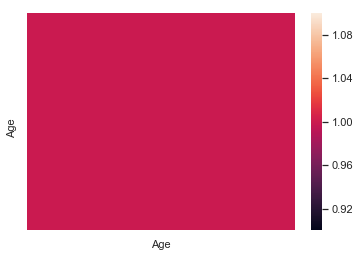

In [13]:
sns.heatmap(data.corr())

# 3. Exploring Predictor Variables / Features :

In [14]:
# View the (Rows,Columns) in DataFrame :

data.shape

(1021, 8)

### 3.1 Find and Impute Missing Values : 

In [15]:
# Sum of Missing Values in Each Column :

data.isnull().sum().sort_values(ascending=False)

# NOTE : Since there are Few Missing Values in any of the Columns, Imputation is Needed.

Personal Loan         2
Housing Loan          2
Job                   2
Credit Default        1
Education             1
Marital Status        1
Term Deposit Taken    0
Age                   0
dtype: int64

In [16]:
# Fill the Missing Values with Forward Fill Technique :

data.fillna(method='ffill',inplace=True)

# Verify the Missing Values After Fill :

print(data.isnull().sum())

Age                   0
Job                   0
Marital Status        0
Education             0
Credit Default        0
Housing Loan          0
Personal Loan         0
Term Deposit Taken    0
dtype: int64


In [17]:
help (data.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset=None, keep='first', inplace=False) method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed, optionally only
    considering certain columns.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns
    keep : {'first', 'last', False}, default 'first'
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : boolean, default False
        Whether to drop duplicates in place or to return a copy
    
    Returns
    -------
    deduplicated : DataFrame



In [18]:
# dropping ALL duplicte values 

# data.drop_duplicates(keep = 'first', inplace = True) 

In [19]:
# View the (Rows,Columns) in DataFrame :

data.shape

(1021, 8)

# 4. Finding Unique Values and Total Counts :

In [20]:
data.columns

Index(['Age', 'Job', 'Marital Status', 'Education', 'Credit Default',
       'Housing Loan', 'Personal Loan', 'Term Deposit Taken'],
      dtype='object')

### 4.1 Predictors / Independent Variables :

In [21]:
# Binning the Data of Age to make it Categorical :

data['Age'] = pd.cut(data['Age'], [10, 20, 30,40, 50, 60, 70, 80, 90], labels=['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

Age - Unique Values :

 [21-30, 31-40, 51-60, 41-50, 11-20, 61-70, 71-80, 81-90]
Categories (8, object): [11-20 < 21-30 < 31-40 < 41-50 < 51-60 < 61-70 < 71-80 < 81-90] 


Age - No of Unique Values :

 8 


Age - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


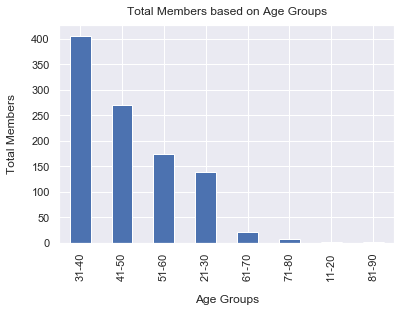

In [22]:
# Unique Age Values :

print("Age - Unique Values :\n\n",          data['Age'].unique(),'\n\n')
print("Age - No of Unique Values :\n\n",    data['Age'].nunique(),'\n\n')
# print("Age - Frequency Count Values :\n\n", data['Age'].value_counts())
print("Age - Frequency Count Values :\n\n", data['Age'].value_counts().plot(kind="bar"))
plt.xlabel("Age Groups", labelpad=14)
plt.ylabel("Total Members", labelpad=14)
plt.title("Total Members based on Age Groups", y=1.02);

Job - Unique Values :

 ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown'] 


Job - No of Unique Values :

 12 


Job - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


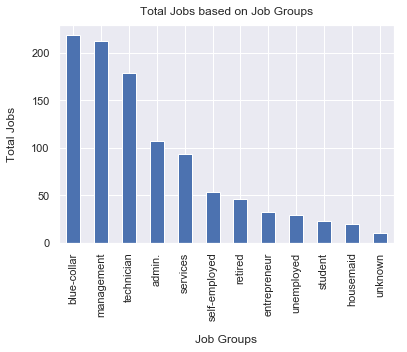

In [23]:
# Unique Job Values :

print("Job - Unique Values :\n\n",          data['Job'].unique(),'\n\n')
print("Job - No of Unique Values :\n\n",    data['Job'].nunique(),'\n\n')
print("Job - Frequency Count Values :\n\n", data['Job'].value_counts().plot(kind="bar"))
plt.xlabel("Job Groups", labelpad=14)
plt.ylabel("Total Jobs", labelpad=14)
plt.title("Total Jobs based on Job Groups", y=1.02);

Marital Status - Unique Values :

 ['married' 'single' 'divorced'] 


Marital Status - No of Unique Values :

 3 


Marital Status - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


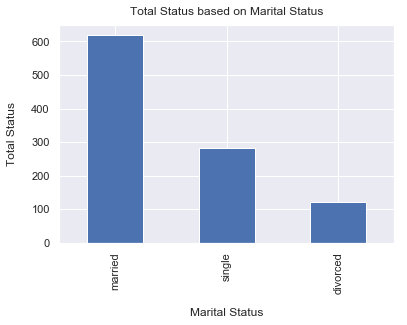

In [24]:
# Unique Marital Status Values :

print("Marital Status - Unique Values :\n\n",          data['Marital Status'].unique(),'\n\n')
print("Marital Status - No of Unique Values :\n\n",    data['Marital Status'].nunique(),'\n\n')
print("Marital Status - Frequency Count Values :\n\n", data['Marital Status'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

Education - Unique Values :

 ['primary' 'secondary' 'tertiary' 'unknown'] 


Education - No of Unique Values :

 4 


Education - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


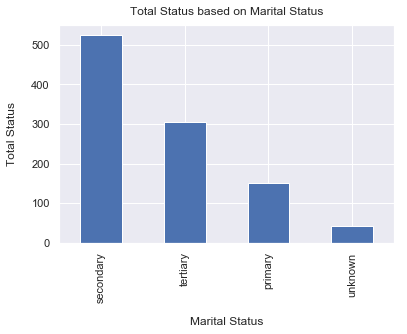

In [25]:
# Unique Education Values :

print("Education - Unique Values :\n\n",               data['Education'].unique(),'\n\n')
print("Education - No of Unique Values :\n\n",         data['Education'].nunique(),'\n\n')
print("Education - Frequency Count Values :\n\n", data['Education'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

# NOTE : We have Inconsistent 4th Category - 'unknown'.

Credit Default - Unique Values :

 ['no' 'yes'] 


Credit Default - No of Unique Values :

 2 


Credit Default - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


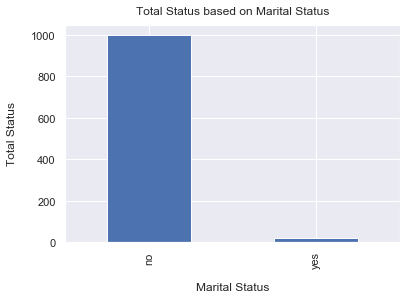

In [26]:
# Unique Credit Default Values :

print("Credit Default - Unique Values :\n\n",          data['Credit Default'].unique(),'\n\n')
print("Credit Default - No of Unique Values :\n\n",    data['Credit Default'].nunique(),'\n\n')
print("Credit Default - Frequency Count Values :\n\n", data['Credit Default'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

Housing Loan - Unique Values :

 ['no' 'yes' 'xxxyy'] 


Housing Loan - No of Unique Values :

 3 


Housing Loan - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


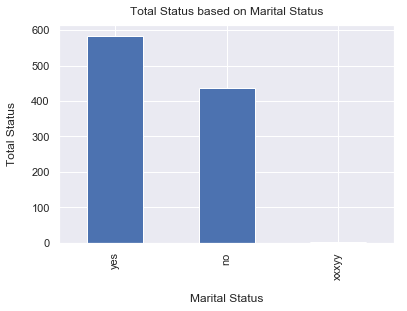

In [27]:
# Unique Housing Loan Values :

print("Housing Loan - Unique Values :\n\n",          data['Housing Loan'].unique(),'\n\n')
print("Housing Loan - No of Unique Values :\n\n",    data['Housing Loan'].nunique(),'\n\n')
print("Housing Loan - Frequency Count Values :\n\n", data['Housing Loan'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

# NOTE : We have Inconsistent 3rd Category - 'xxxyy'.

In [28]:
data['Housing Loan'] = data['Housing Loan'].str.replace('xxxyy','yes')

Housing Loan - Unique Values :

 ['no' 'yes'] 


Housing Loan - No of Unique Values :

 2 


Housing Loan - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


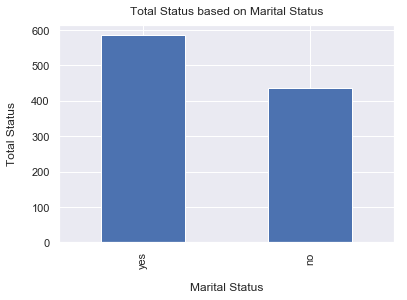

In [29]:
# Unique Housing Loan Values :

print("Housing Loan - Unique Values :\n\n",          data['Housing Loan'].unique(),'\n\n')
print("Housing Loan - No of Unique Values :\n\n",    data['Housing Loan'].nunique(),'\n\n')
print("Housing Loan - Frequency Count Values :\n\n", data['Housing Loan'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

# NOTE : We have Inconsistent 3rd Category - 'xxxyy' => Replaced with Yes.

Personal Loan - Unique Values :

 ['no' 'yes'] 


Personal Loan - No of Unique Values :

 2 


Personal Loan - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


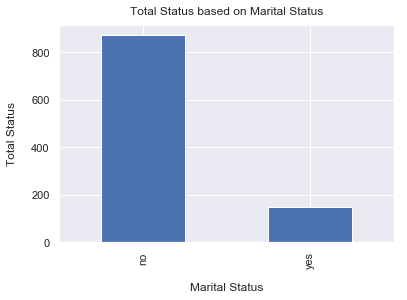

In [30]:
# Unique Personal Loan Values :

print("Personal Loan - Unique Values :\n\n",       data['Personal Loan'].unique(),'\n\n')
print("Personal Loan - No of Unique Values :\n\n", data['Personal Loan'].nunique(),'\n\n')
print("Personal Loan - Frequency Count Values :\n\n", data['Personal Loan'].value_counts().plot(kind="bar"))
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("Total Status", labelpad=14)
plt.title("Total Status based on Marital Status", y=1.02);

### 4.2. Exploring Target Varaible :

Term Deposit Taken - Unique Values :

 ['no' 'yes'] 


Term Deposit Taken - No of Unique Values :

 2 


Term Deposit Taken - Frequency Count Values :

 AxesSubplot(0.125,0.125;0.775x0.755)


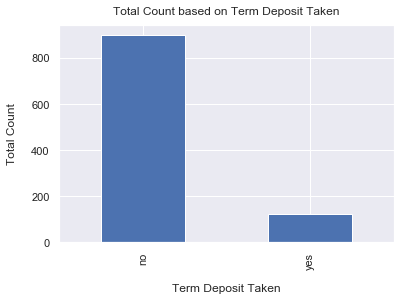

In [31]:
# Unique Term Deposit Taken Values :

print("Term Deposit Taken - Unique Values :\n\n",       data['Term Deposit Taken'].unique(),'\n\n')
print("Term Deposit Taken - No of Unique Values :\n\n", data['Term Deposit Taken'].nunique(),'\n\n')
print("Term Deposit Taken - Frequency Count Values :\n\n", data['Term Deposit Taken'].value_counts().plot(kind="bar"))
plt.xlabel("Term Deposit Taken", labelpad=14)
plt.ylabel("Total Count", labelpad=14)
plt.title("Total Count based on Term Deposit Taken", y=1.02);

In [32]:
# for index in data.columns:
#     print('-----{}-----'.format(index))
#     print(data[index].describe())
#     print()

In [33]:
# # Cross Tab to display Education stats with respect to y (ie) Target variable :

# pd.crosstab(index=data["Education"], columns=data["Term Deposit Taken"])

In [34]:
# # Barplot for the Predictor / Independent Variable - job : 

# sns.countplot(y="Job", data=data)
# plt.show()

In [35]:
# # Barplot for the Predictor / Independent Variable - marital : 

# sns.countplot(x="marital", data=data)
# plt.show()

In [36]:
# # Barplot for the Predictor / Independent Variable - default : 

# sns.countplot(x="default", data=data)
# plt.show()

In [37]:
# # Barplot for the Predictor / Independent Variable - housing : 

# sns.countplot(x="housing", data=data)
# plt.show()

In [38]:
# # Barplot for the Predictor / Independent Variable - loan : 

# sns.countplot(x="loan", data=data)
# plt.show()

In [39]:
# # Barplot for the Predictor / Independent Variable - poutcome : 

# sns.countplot(x="poutcome", data=data)
# plt.show()

In [40]:
# # Barplot for the Target / Dependent Variable :

# sns.countplot(x='y',data=data, palette='hls')
# plt.show()

In [41]:
# # Assumption 1 :

# - <b>Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. So, we will drop the variables that we do not need.</b>

In [42]:
# data_new_2 = data.copy(deep=True)
# data.drop(data.columns[[0,3,8,9,10,11,12,13]],axis=1,inplace=True)

In [43]:
# # Creating Dummies for Categorical Variables :

# data_new = pd.get_dummies(data, columns=['job','marital',
#                                          'default',
#                                          'housing','loan',
#                                          'poutcome'])

# # data_new = pd.get_dummies(data, columns=['job','marital',
# #                                          'education','default',
# #                                          'housing','loan',
# #                                          'contact','month',
# #                                          'poutcome'])

# 5. Back Up / Copy Data Frame :

In [44]:
data.head()

,Age,Job,Marital Status,Education,Credit Default,Housing Loan,Personal Loan,Term Deposit Taken
0,21-30,unemployed,married,primary,no,no,no,no
1,31-40,services,married,secondary,no,yes,yes,no
2,31-40,management,single,tertiary,no,yes,no,no
3,21-30,management,married,tertiary,no,yes,yes,no
4,51-60,blue-collar,married,secondary,no,yes,no,no


In [45]:
# Copy of Data Frame / Data Set without Preprocessing :

df_2 = copy.copy(data)

In [46]:
df_2.head()

,Age,Job,Marital Status,Education,Credit Default,Housing Loan,Personal Loan,Term Deposit Taken
0,21-30,unemployed,married,primary,no,no,no,no
1,31-40,services,married,secondary,no,yes,yes,no
2,31-40,management,single,tertiary,no,yes,no,no
3,21-30,management,married,tertiary,no,yes,yes,no
4,51-60,blue-collar,married,secondary,no,yes,no,no


# 6. Label Encode the Variables :

### 6.1 Converting Object Type to Integer using One-Hot Encoding :

In [47]:
# Fetching Data Type of all Columns :

data.dtypes

Age                   category
Job                     object
Marital Status          object
Education               object
Credit Default          object
Housing Loan            object
Personal Loan           object
Term Deposit Taken      object
dtype: object

In [48]:
labelencoder = LabelEncoder()

In [49]:
df_2.iloc[:,0] = labelencoder.fit_transform(df_2.iloc[:,0])
df_2.iloc[:,1] = labelencoder.fit_transform(df_2.iloc[:,1])
df_2.iloc[:,2] = labelencoder.fit_transform(df_2.iloc[:,2])
df_2.iloc[:,3] = labelencoder.fit_transform(df_2.iloc[:,3])
df_2.iloc[:,4] = labelencoder.fit_transform(df_2.iloc[:,4])
df_2.iloc[:,5] = labelencoder.fit_transform(df_2.iloc[:,5])
df_2.iloc[:,6] = labelencoder.fit_transform(df_2.iloc[:,6])
df_2.iloc[:,7] = labelencoder.fit_transform(df_2.iloc[:,7])

In [50]:
# # Coverting Target Variable / Column into Binary Format :

# df_2["Term Deposit Taken"].replace(('yes', 'no'), (1, 0), inplace=True)

In [51]:
# Successfully converted Object data into  Integer data types

df_2.dtypes

Age                   int32
Job                   int32
Marital Status        int32
Education             int32
Credit Default        int32
Housing Loan          int32
Personal Loan         int32
Term Deposit Taken    int32
dtype: object

In [52]:
df_2.head()

,Age,Job,Marital Status,Education,Credit Default,Housing Loan,Personal Loan,Term Deposit Taken
0,1,10,1,0,0,0,0,0
1,2,7,1,1,0,1,1,0
2,2,4,2,2,0,1,0,0
3,1,4,1,2,0,1,1,0
4,4,1,1,1,0,1,0,0


### 6.2 Classifiers : 

<br>
1. CART Decision Tree Classifier
<br>
<br>
2. ID3 Decision Tree Classifier

In [53]:
# help(DecisionTreeClassifier())

In [54]:
# Creating Dictionary with Classifiers :

classifiers = {
               '1. CART Decision Tree Classifier': DecisionTreeClassifier(criterion='gini', max_depth=3),
               '2. ID3 Decision Tree Classifier': DecisionTreeClassifier(criterion='entropy', max_depth=3)
               }
display(classifiers)

# '1. Decision Tree Classifier': DecisionTreeClassifier(criterion='gini', class_weight="balanced",max_depth=6,max_leaf_nodes=20,presort =True,random_state=10),
# '2. Decision Tree Classifier': DecisionTreeClassifier(criterion='entropy' , class_weight="balanced",max_depth=6,max_leaf_nodes=20,presort =True,random_state=10)

{'1. CART Decision Tree Classifier': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 '2. ID3 Decision Tree Classifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best')}

In [55]:
# View the (Rows,Columns) in DataFrame :
# Due to One Hot Encoding Increase in the Number of Columns :

df_2.shape

(1021, 8)

# 7. Splitting Predictor and Target Variables into X and y : 

In [56]:
# Seperating Predictor and Target Columns into X and y Respectively :

# Split dataset in Predictors/Features/Independent Variables and Target/Dependent variable :

display(data.columns)

predictors = ['Age', 'Job', 'Marital Status', 'Education', 'Credit Default','Housing Loan', 'Personal Loan']

# Method 1 - For SMALL Dataset :

data_X = df_2[['Age', 'Job', 'Marital Status', 'Education', 'Credit Default','Housing Loan', 'Personal Loan']]
data_y = pd.DataFrame(df_2['Term Deposit Taken'])

# Method 2 - For LARGE Dataset :

# data_X = df_2.drop(['Term Deposit Taken'], axis=1)
# data_y = pd.DataFrame(df_2['Term Deposit Taken'])

display("Predictors : ",data_X.head())
display("Target : ",data_y.head())

Index(['Age', 'Job', 'Marital Status', 'Education', 'Credit Default',
       'Housing Loan', 'Personal Loan', 'Term Deposit Taken'],
      dtype='object')

'Predictors : '

,Age,Job,Marital Status,Education,Credit Default,Housing Loan,Personal Loan
0,1,10,1,0,0,0,0
1,2,7,1,1,0,1,1
2,2,4,2,2,0,1,0
3,1,4,1,2,0,1,1
4,4,1,1,1,0,1,0


'Target : '

,Term Deposit Taken
0,0
1,0
2,0
3,0
4,0


In [57]:
# Log Columns Headings :

log_cols = ["Classifier", "Accuracy","Precision","Recall","F1","ROC_AUC","CV_2_Fold","CV_5_Fold","CV_10_Fold","CV_20_Fold"]
# 
log = pd.DataFrame(columns=log_cols)

# Metric Columns Headings :

# metrics_cols = ["Precision Score","Recall Score","F1-Score","roc-ROC_AUC_Score"]
# metric = pd.DataFrame(columns=metrics_cols)

# 8. Splitting Training and Test Data and Applying Classification Models :

# 9. Standardizing, Fitting, Predicting and Scoring the Data using all Classifiers along with Confusion Matrix :

In [58]:
pwd

'C:\\Users\\LD196YS\\Desktop\\10. BITS_Assignment\\2.DM\\Assignment_1'

1. CART Decision Tree Classifier


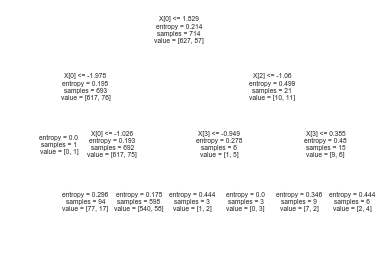

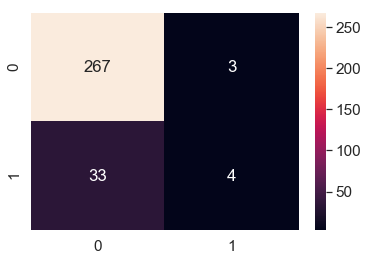

(714, 1)
(714,)
1. CART Decision Tree Classifier


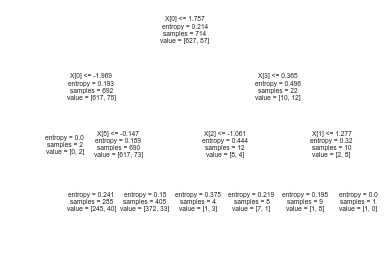

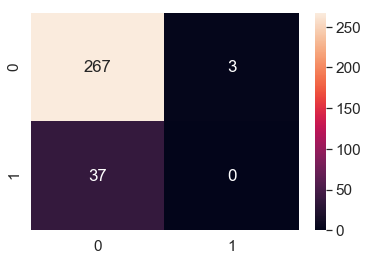

(714, 1)
(714,)
2. ID3 Decision Tree Classifier


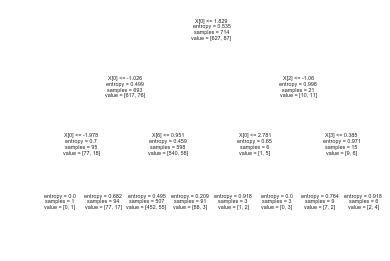

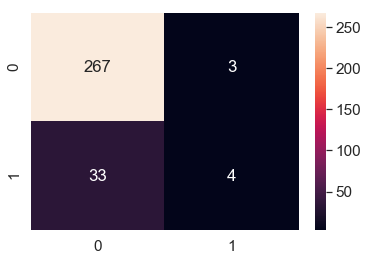

(714, 1)
(714,)
2. ID3 Decision Tree Classifier


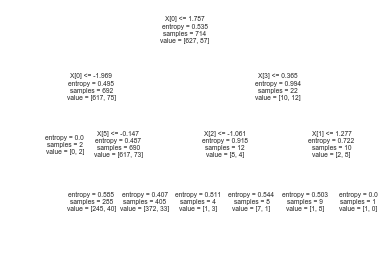

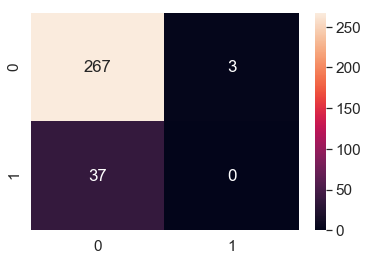

(714, 1)
(714,)


In [59]:
import warnings
warnings.filterwarnings('ignore')

rs = StratifiedShuffleSplit(n_splits=2, test_size=0.3,random_state=2)
rs.get_n_splits(data_X,data_y)

confusionn_matrix = None

for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        
        print(Name)
        
        # print("TRAIN:", train_index, "TEST:", test_index)
        
        # Splitting Training and Testing Data :
        
        X_train,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y_train,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
                              
        # Standardizing Features :
        
        sc_X    = StandardScaler()
        X_train = sc_X.fit_transform(X_train)
        X_test  = sc_X.transform(X_test)
        
        # Normalizing Features :
        
#         Mn_Mx_X = MinMaxScaler()
#         X_train = Mn_Mx_X.fit_transform(X_train)
#         X_test =  Mn_Mx_X.transform(X_test)
        
        # Fitting of Train Data and Predicting with Test Data :
        
        cls   = classify
        cls   = cls.fit(X_train,y_train)
        
        # Plotting and Visualizing the Decision Tree :
        
        plot_tree(cls)
        fig = gcf()
        fig.savefig(Name+'tree.jpg')
        plt.show() 
#         dot_data = StringIO()
#         export_graphviz(cls, out_file=dot_data,  
#                         filled=True, rounded=True,
#                         special_characters=True, feature_names = predictors,class_names=['0','1'])
#         graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#         graph.write_png('Term Deposit.png')
#         Image(graph.create_png())
        
        y_out = cls.predict(X_test)
        
        # Calculating Accuracy, Precision, Recall, ROC_AUC and F1 Scores :
        
        accuracy  = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out)
        recall    = m.recall_score(y_test,y_out)
        roc_auc   = m.roc_auc_score(y_out,y_test)
        f1_score  = m.f1_score(y_test,y_out)
        confusionn_matrix = confusion_matrix(y_test, y_out)
        
#         print("Confusion Matrix : ", confusionn_matrix)
        
        
        sns.set(font_scale=1.4)#for label size
        sns.heatmap(confusionn_matrix, annot=True,fmt='g')# font size
        plt.show() 
        # Calculating Cross-Validation AUC Score :
        
        print(y_train.shape)
        print(y_train['Term Deposit Taken'].shape)
        
        cross_val_score_2_fold  = cross_val_score(classify, X_train, y_train['Term Deposit Taken'], cv=2, scoring='roc_auc').mean()
        cross_val_score_5_fold  = cross_val_score(classify, X_train, y_train['Term Deposit Taken'], cv=5, scoring='roc_auc').mean()
        cross_val_score_10_fold = cross_val_score(classify, X_train, y_train['Term Deposit Taken'], cv=10, scoring='roc_auc').mean()
        cross_val_score_20_fold = cross_val_score(classify, X_train, y_train['Term Deposit Taken'], cv=20, scoring='roc_auc').mean()
                
        # Classification Report for All Classification Models :
        
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,cross_val_score_2_fold,cross_val_score_5_fold,cross_val_score_10_fold,cross_val_score_20_fold]], columns=log_cols)
        # 
        log       = log.append(log_entry)
        
        # Creating DataFrame with  2 Columns , Replacing Numbers with Category, Saving Target Prediction as CSV File with Index :
                
        df = pd.DataFrame({'Index': y_test.index.tolist(), 'Term_Deposit': y_out})        
        df['Term_Deposit'].replace((1, 0), ('yes', 'no'), inplace=True)        
        df.to_csv(result_location + "Term_Deposit_"+Name+".csv", header=['Index','Term Deposit Taken'],index=0)
        
        # Plotting ROC-AUC using True Positive Rate (Sensitivity) vs False Positive Rate (1 - Specificity) :  
        
#         if(Name!="8. Support Vector Classifier"):
            
#             y_pred_proba        = classify.predict_proba(X_test)[::,1]
#             fpr, tpr, threshold = m.roc_curve(y_test,  y_pred_proba)

#             # First argument is True values, second argument is Predicted Probabilities :

#             auc = m.roc_auc_score(y_test, y_pred_proba)

#             plt.plot(fpr,tpr,label="data 1, AUC="+str(auc))
#             plt.legend(loc=4)
#             plt.xlabel('False Positive Rate (1 - Specificity)')
#             plt.ylabel('True Positive Rate (Sensitivity)')
#             plt.rcParams['font.size'] = 12        
#             plt.plot([0, 1], [0, 1], color='blue', linestyle='--')        
#             plt.show()          
            
            
                
# Scroll complete output to view all the accuracy scores and bar graph.

In [60]:
%tb

No traceback available to show.


In [61]:
log

,Classifier,Accuracy,Precision,Recall,F1,ROC_AUC,CV_2_Fold,CV_5_Fold,CV_10_Fold,CV_20_Fold
0,1. CART Decision Tree Classifier,0.882736,0.571429,0.108108,0.181818,0.730714,0.524252,0.543926,0.548253,0.559511
0,1. CART Decision Tree Classifier,0.869707,0.000000,0.000000,0.000000,0.439145,0.607566,0.592957,0.563813,0.525151
0,2. ID3 Decision Tree Classifier,0.882736,0.571429,0.108108,0.181818,0.730714,0.552662,0.550022,0.545875,0.579788
0,2. ID3 Decision Tree Classifier,0.869707,0.000000,0.000000,0.000000,0.439145,0.619046,0.600850,0.591393,0.522208


# 10. Performance Metric using Precision and Recall Calculation along with roc_auc_score & accuracy_score :

### 1. Accuracy Score Comparison for All Classification Models :

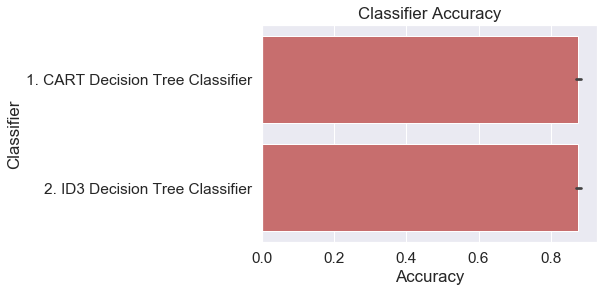

In [62]:
# Accuracy Score Comparison :

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="r")  
plt.show()

### 2. Precision Score Comparison for All Classification Models :

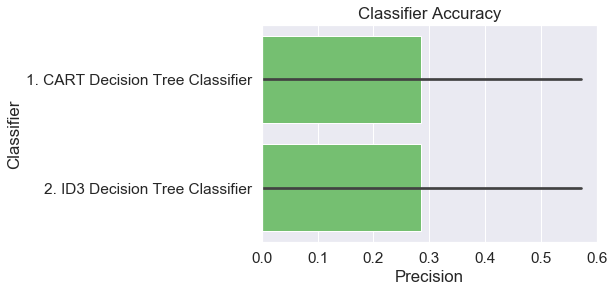

In [63]:
# Precision Score Comparison :

plt.xlabel('Precision')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log, color="g")  
plt.show()

### 3. Recall Score Comparison for All Classification Models :

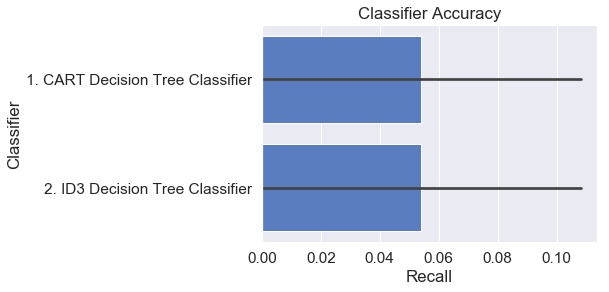

In [64]:
# Recall Score Comparison :

plt.xlabel('Recall')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log, color="b")  
plt.show()

### 4. ROC_AUC Score Comparison for All Classification Models :

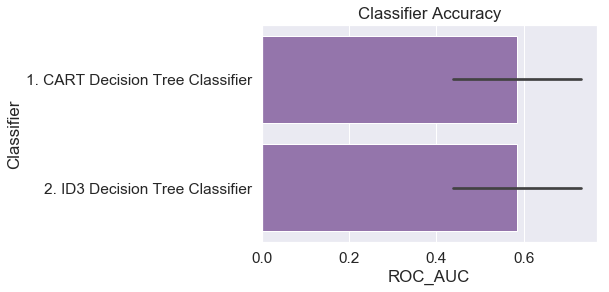

In [65]:
# ROC_AUC Score Comparison :

plt.xlabel('ROC_AUC')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='ROC_AUC', y='Classifier', data=log, color="m")  
plt.show()

### 5. F1 Score Comparison for All Classification Models :

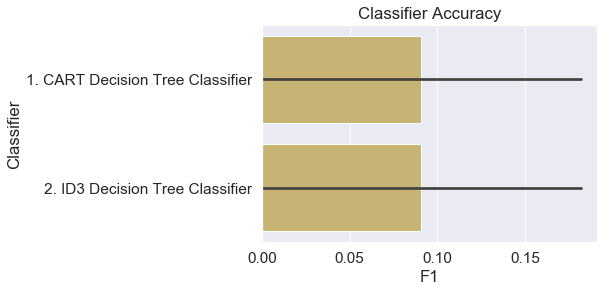

In [66]:
# F1 Score Comparison :

plt.xlabel('F1')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='F1', y='Classifier', data=log, color="y")  
plt.show()

### 6. CV_2_Fold Comparison for All Classification Models :

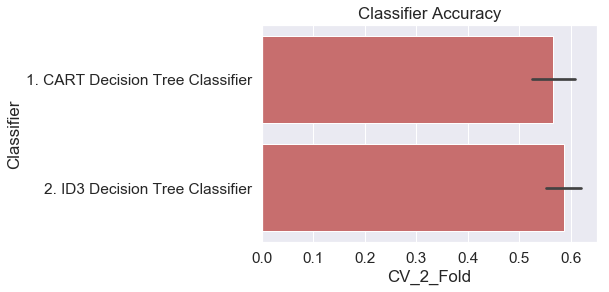

In [67]:
# CV_2_Fold Comparison :

plt.xlabel('CV_2_Fold')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='CV_2_Fold', y='Classifier', data=log, color="r")  
plt.show()

### 7. CV_5_Fold Comparison for All Classification Models :

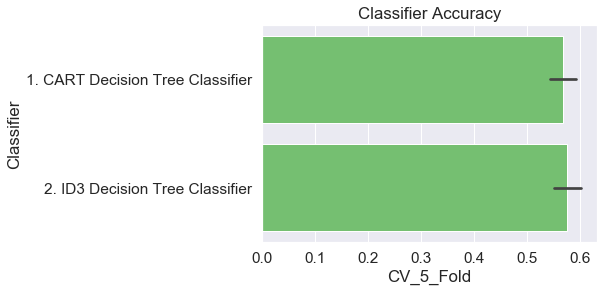

In [68]:
# CV_5_Fold Comparison :

plt.xlabel('CV_5_Fold')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='CV_5_Fold', y='Classifier', data=log, color="g")  
plt.show()

### 8. CV_10_Fold Comparison for All Classification Models :

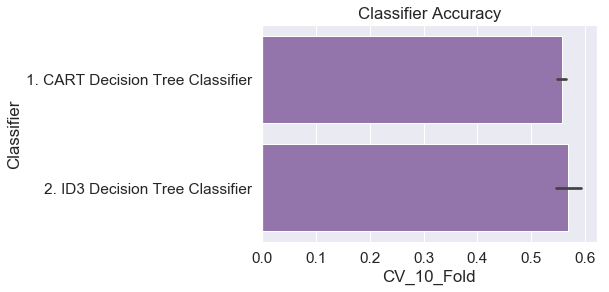

In [69]:
# CV_10_Fold Comparison :

plt.xlabel('CV_10_Fold')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='CV_10_Fold', y='Classifier', data=log, color="m")  
plt.show()

### 9. CV_20_Fold Comparison for All Classification Models :

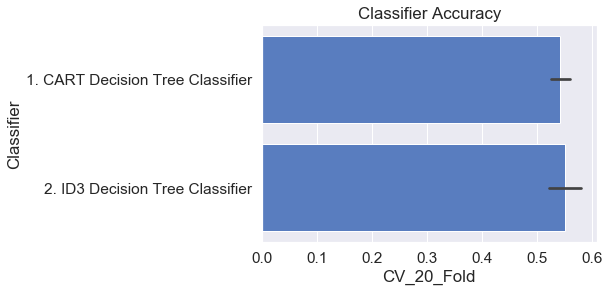

In [70]:
# CV_20_Fold Comparison :

plt.xlabel('CV_20_Fold')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='CV_20_Fold', y='Classifier', data=log, color="b")  
plt.show()